이번 예제는 특정 폴더에 저장되어 있는 모든 다이콤 파일을 3D array로 불러오는 과정입니다.
pydicom, matplotlib, os, numpy 를 import하여야 합니다.

In [1]:
%matplotlib inline
import dicom
import matplotlib.pyplot as plt

In [2]:
import os
pathdicom = "./dicom"
dicomfiles = []
for dirName, subdirList, fileList in os.walk(pathdicom):
    for filename in fileList:
        if ".dcm" in filename.lower():
            dicomfiles.append(os.path.join(dirName,filename))


dicom이라는 폴더에 있는 모든 dcm확장자를 가진 파일의 list를 읽기 편하도록 dicomfiles가 가지도록 하는 과정입니다. pathdicom에서 .은 현재 작업위치를 나타냅니다. 아래의 실행을 통해 dicomfiles가 위치를 포함하는 dcm파일 리스트가 된 것을 확인할 수 있습니다.

In [3]:
dicomfiles

['./dicom\\IM-0001-0026-0001.dcm',
 './dicom\\IM-0001-0027-0001.dcm',
 './dicom\\IM-0001-0028-0001.dcm',
 './dicom\\IM-0001-0029-0001.dcm',
 './dicom\\IM-0001-0030-0001.dcm',
 './dicom\\IM-0001-0031-0001.dcm',
 './dicom\\IM-0001-0032-0001.dcm',
 './dicom\\IM-0001-0033-0001.dcm',
 './dicom\\IM-0001-0034-0001.dcm',
 './dicom\\IM-0001-0035-0001.dcm',
 './dicom\\IM-0001-0036-0001.dcm',
 './dicom\\IM-0001-0037-0001.dcm',
 './dicom\\IM-0001-0038-0001.dcm',
 './dicom\\IM-0001-0039-0001.dcm',
 './dicom\\IM-0001-0040-0001.dcm',
 './dicom\\IM-0001-0041-0001.dcm',
 './dicom\\IM-0001-0042-0001.dcm',
 './dicom\\IM-0001-0043-0001.dcm',
 './dicom\\IM-0001-0044-0001.dcm',
 './dicom\\IM-0001-0045-0001.dcm',
 './dicom\\IM-0001-0046-0001.dcm',
 './dicom\\IM-0001-0047-0001.dcm',
 './dicom\\IM-0001-0048-0001.dcm',
 './dicom\\IM-0001-0049-0001.dcm',
 './dicom\\IM-0001-0050-0001.dcm',
 './dicom\\IM-0001-0051-0001.dcm',
 './dicom\\IM-0001-0052-0001.dcm',
 './dicom\\IM-0001-0053-0001.dcm',
 './dicom\\IM-0001-0

In [4]:
import numpy
imgtmp = dicom.read_file(dicomfiles[0])
dcmimg0 = imgtmp.pixel_array
imgsize = dcmimg0.shape
imgdims = (imgsize[0],imgsize[1], len(dicomfiles))
dcmimgs = numpy.zeros(imgdims, dtype = int)

전체 다이콤파일의 영상정보를 저장하기 위한 3d array를 미리 정의하는 과정입니다. 모든 다이콤의 크기가 동일하다고 가정하고 한 개의 다이콤 파일을 읽어 영상의 크기 정보를 가져오고, 전체 파일의 개수를 len으로 계산하여 integer type의 모든 값이 0인 3d array를 만들었습니다.

In [5]:
for fn in dicomfiles:
    tmp = dicom.read_file(fn)
    dcmimgs[:,:,dicomfiles.index(fn)] = tmp.pixel_array

만들어진 파일리스트를 이용하여 3d array를 다이콤 파일의 정보들로 채우는 과정입니다. 

In [6]:
dcmimgs.shape

(512, 512, 86)

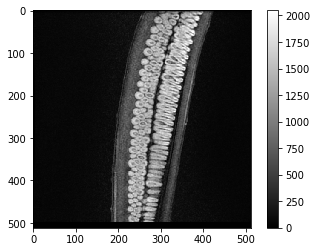

In [7]:
imgplot = plt.imshow(dcmimgs[:,:,42], cmap="gray", clim=(0, 2048))
plt.colorbar()

42번째 슬라이스를 시각화한 것입니다. 폴더 안의 다이콤 파일은 3차원으로 얻어진 영상으로 아래와 같이 다른 단면으로도 시각화 해 볼 수가 있습니다.

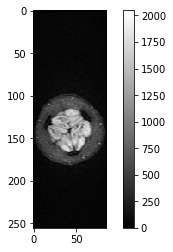

In [8]:
imgplot = plt.imshow(dcmimgs[256,::2,:], cmap="gray", clim=(0, 2048))
plt.colorbar()

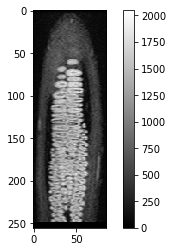

In [9]:
imgplot = plt.imshow(dcmimgs[::2,256,:], cmap="gray", clim=(0, 2048))
plt.colorbar()